TensorFlow Version: 2.19.0

========== Downloading Food-101 Dataset ==========
Please wait... Dataset download ho raha hai (5GB)

✅ Dataset downloaded successfully!

Total classes: 101

First 20 food items:
  1. Apple Pie
  2. Baby Back Ribs
  3. Baklava
  4. Beef Carpaccio
  5. Beef Tartare
  6. Beet Salad
  7. Beignets
  8. Bibimbap
  9. Bread Pudding
  10. Breakfast Burrito
  11. Bruschetta
  12. Caesar Salad
  13. Cannoli
  14. Caprese Salad
  15. Carrot Cake
  16. Ceviche
  17. Cheese Plate
  18. Cheesecake
  19. Chicken Curry
  20. Chicken Quesadilla

Settings:
  Image size: 299x299
  Batch size: 32
  Epochs: 15

========== Preparing Datasets ==========
✅ Datasets prepared!

========== Visualizing Dataset Samples ==========


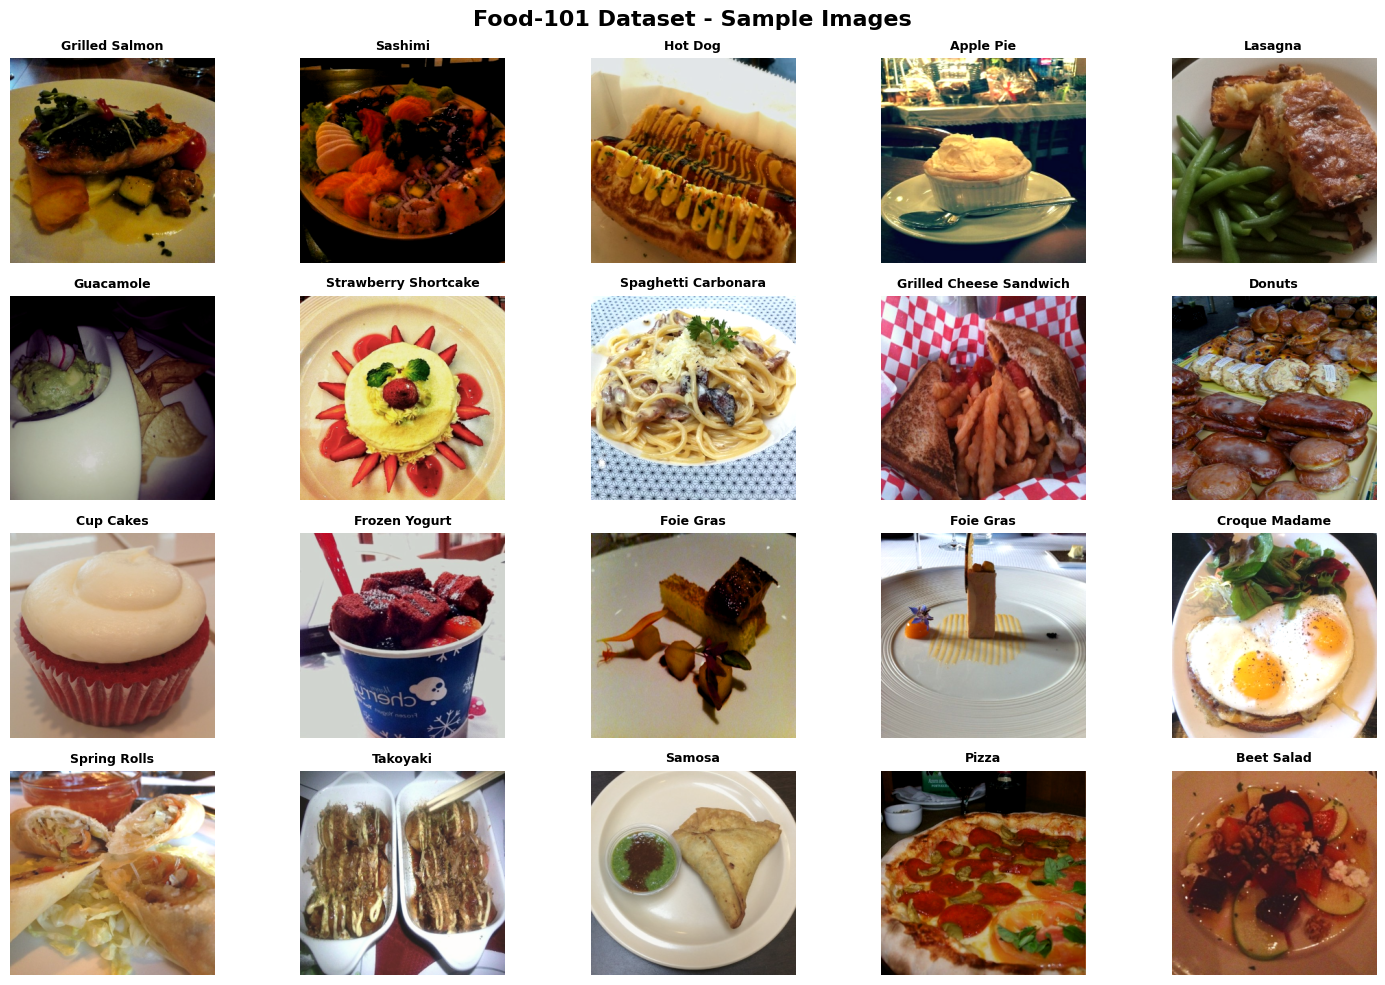

✅ Dataset samples saved: food101_dataset_samples.png

========== Visualizing Data Augmentation ==========


KeyboardInterrupt: 

In [1]:
# Food-101 Simple Inception Transfer Learning
# Complete working code with dataset download

# ==================== LIBRARIES ====================
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pathlib

print("TensorFlow Version:", tf.__version__)


# ==================== DATASET DOWNLOAD ====================
print("\n========== Downloading Food-101 Dataset ==========")
print("Please wait... Dataset download ho raha hai (5GB)")

# TensorFlow Datasets use karenge - easy aur automatic
import tensorflow_datasets as tfds

# Food-101 dataset download aur load karo
# Ye automatically download karega agar nahi hai
dataset_name = 'food101'

print("\nDownloading and preparing dataset...")
train_ds, val_ds = tfds.load(
    dataset_name,
    split=['train[:80%]', 'train[80%:]'],  # 80-20 split
    as_supervised=True,
    with_info=False
)

print("✅ Dataset downloaded successfully!")


# ==================== DATASET INFO ====================
# Food-101 mein 101 classes hain
class_names = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla',
    'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder',
    'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
    'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
    'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras',
    'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice',
    'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
    'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup',
    'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna',
    'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup',
    'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters',
    'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck',
    'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib',
    'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto',
    'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits',
    'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake',
    'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare',
    'waffles'
]

num_classes = len(class_names)
print(f"\nTotal classes: {num_classes}")
print(f"\nFirst 20 food items:")
for i in range(20):
    print(f"  {i+1}. {class_names[i].replace('_', ' ').title()}")


# ==================== SETTINGS ====================
image_height = 299
image_width = 299
batch_size = 32
epochs = 15

print(f"\nSettings:")
print(f"  Image size: {image_height}x{image_width}")
print(f"  Batch size: {batch_size}")
print(f"  Epochs: {epochs}")


# ==================== PREPROCESSING FUNCTIONS ====================

# Preprocessing function - image ko resize aur normalize karo
def preprocess_image(image, label):
    # Resize to 299x299
    image = tf.image.resize(image, [image_height, image_width])
    # Normalize to 0-1
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


# Data augmentation function - training images ke liye
def augment_image(image, label):
    # Random horizontal flip
    image = tf.image.random_flip_left_right(image)

    # Random brightness
    image = tf.image.random_brightness(image, max_delta=0.2)

    # Random contrast
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # Random saturation
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)

    # Clip values to 0-1
    image = tf.clip_by_value(image, 0.0, 1.0)

    return image, label


# ==================== PREPARE DATASETS ====================
print("\n========== Preparing Datasets ==========")

# Training dataset - preprocessing + augmentation
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Validation dataset - sirf preprocessing
val_ds = val_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

print("✅ Datasets prepared!")


# ==================== VISUALIZE DATASET ====================
print("\n========== Visualizing Dataset Samples ==========")

# Training dataset se images lo
sample_images = []
sample_labels = []

for images, labels in train_ds.take(1):
    for i in range(min(20, len(images))):
        sample_images.append(images[i].numpy())
        sample_labels.append(labels[i].numpy())

# Plot karo
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Food-101 Dataset - Sample Images', fontsize=16, fontweight='bold')

for i in range(min(20, len(sample_images))):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(sample_images[i])
    food_name = class_names[sample_labels[i]].replace('_', ' ').title()
    plt.title(food_name, fontsize=9, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.savefig('food101_dataset_samples.png', dpi=200, bbox_inches='tight')
plt.show()
print("✅ Dataset samples saved: food101_dataset_samples.png")


# ==================== VISUALIZE AUGMENTATION ====================
print("\n========== Visualizing Data Augmentation ==========")

# Ek single image lo augmentation dikhane ke liye
for images, labels in train_ds.take(1):
    original_image = images[0].numpy()
    food_label = class_names[labels[0].numpy()].replace('_', ' ').title()
    break

fig = plt.figure(figsize=(15, 10))
fig.suptitle(f'Data Augmentation Examples: {food_label}', fontsize=16, fontweight='bold')

# Original image
ax = plt.subplot(3, 4, 1)
plt.imshow(original_image)
plt.title('Original', fontsize=11, fontweight='bold', color='green')
plt.axis('off')

# Augmented versions
for i in range(11):
    for images, _ in train_ds.take(1):
        aug_img = images[0].numpy()
        break

    ax = plt.subplot(3, 4, i + 2)
    plt.imshow(aug_img)
    plt.title(f'Augmented {i+1}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.savefig('food101_augmentation.png', dpi=200, bbox_inches='tight')
plt.show()
print("✅ Augmentation examples saved: food101_augmentation.png")


# ==================== CLASS DISTRIBUTION ====================
print("\n========== Class Distribution ==========")

plt.figure(figsize=(15, 6))

# First 30 classes ka approximate distribution
class_counts = [1000] * 30  # Food-101 mein har class mein 1000 images hain
first_30_classes = [name.replace('_', ' ').title() for name in class_names[:30]]

bars = plt.bar(range(30), class_counts, color='steelblue', alpha=0.8, edgecolor='black')
plt.xlabel('Food Classes', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.title('Food-101 Dataset - Distribution (First 30 Classes)', fontsize=14, fontweight='bold')
plt.xticks(range(30), first_30_classes, rotation=90, ha='right')
plt.ylim(0, 1200)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('food101_distribution.png', dpi=200, bbox_inches='tight')
plt.show()
print("✅ Class distribution saved: food101_distribution.png")


# ==================== BUILD INCEPTION MODEL ====================
print("\n========== Building Inception Model ==========")

# Pre-trained InceptionV3 load karo
base_model = keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(image_height, image_width, 3)
)

print(f"InceptionV3 loaded - {len(base_model.layers)} layers")

# Base model freeze karo
base_model.trainable = False
print("Base model frozen!")

# Custom layers add karo
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(num_classes, activation='softmax')(x)

# Final model
model = keras.Model(inputs=base_model.input, outputs=predictions)

print("✅ Model architecture created!")


# ==================== COMPILE MODEL ====================
print("\n========== Compiling Model ==========")

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model compiled!")


# ==================== TRAINING ====================
print("\n========== Starting Training ==========")
print(f"Training for {epochs} epochs...")
print("This will take some time... Please wait ⏳\n")

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    verbose=1
)

print("\n✅ Training complete!")


# ==================== SAVE MODEL ====================
print("\n========== Saving Model ==========")

model.save('food101_inception_model.h5')
print("✅ Model saved: food101_inception_model.h5")

# Class names save karo
with open('food101_classes.json', 'w') as f:
    json.dump(class_names, f)
print("✅ Class names saved: food101_classes.json")


# ==================== TRAINING HISTORY ====================
print("\n========== Creating Training Graphs ==========")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(epochs_range, val_acc, 'r-s', label='Validation Accuracy', linewidth=2, markersize=6)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b-o', label='Training Loss', linewidth=2, markersize=6)
plt.plot(epochs_range, val_loss, 'r-s', label='Validation Loss', linewidth=2, markersize=6)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('food101_training_history.png', dpi=300)
plt.show()
print("✅ Training history saved: food101_training_history.png")


# ==================== FINAL RESULTS ====================
final_train_acc = acc[-1] * 100
final_val_acc = val_acc[-1] * 100

print("\n" + "="*70)
print("📊 FINAL RESULTS")
print("="*70)
print(f"Training Accuracy: {final_train_acc:.2f}%")
print(f"Validation Accuracy: {final_val_acc:.2f}%")
print("="*70)


# ==================== LOAD MODEL ====================
print("\n========== Loading Model for Predictions ==========")

loaded_model = keras.models.load_model('food101_inception_model.h5')
print("✅ Model loaded!")

# Class names load karo
with open('food101_classes.json', 'r') as f:
    class_names = json.load(f)


# ==================== PREDICTION FUNCTION ====================
print("\n========== Creating Prediction Function ==========")

def predict_food(image_path):
    """
    Single image ka food prediction karo

    Usage: predict_food('pizza.jpg')
    """

    # Check image exists
    if not os.path.exists(image_path):
        print(f"❌ ERROR: Image not found at {image_path}")
        return None, None

    print(f"\n{'='*70}")
    print(f"🍕 FOOD PREDICTION")
    print(f"{'='*70}")
    print(f"Image: {image_path}")

    # Load image
    img = keras.preprocessing.image.load_img(
        image_path,
        target_size=(image_height, image_width)
    )

    # Display image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Input Food Image', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Preprocess
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    print("\n🔍 Analyzing image...")
    predictions = loaded_model.predict(img_array, verbose=0)

    # Get prediction
    predicted_idx = np.argmax(predictions[0])
    predicted_class = class_names[predicted_idx]
    confidence = predictions[0][predicted_idx] * 100

    # Display result
    print(f"\n{'='*70}")
    print(f"🎯 RESULT")
    print(f"{'='*70}")
    print(f"Predicted Food: {predicted_class.upper().replace('_', ' ')}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"{'='*70}")

    # Top 5 predictions
    print(f"\n📊 Top 5 Predictions:")
    print(f"{'-'*70}")

    top5_idx = np.argsort(predictions[0])[-5:][::-1]

    for rank, idx in enumerate(top5_idx, 1):
        food = class_names[idx].replace('_', ' ').title()
        prob = predictions[0][idx] * 100
        bar = '█' * int(prob / 2)

        if rank == 1:
            print(f"🥇 {food:35s} {prob:6.2f}% {bar}")
        elif rank == 2:
            print(f"🥈 {food:35s} {prob:6.2f}% {bar}")
        elif rank == 3:
            print(f"🥉 {food:35s} {prob:6.2f}% {bar}")
        else:
            print(f"   {food:35s} {prob:6.2f}% {bar}")

    print(f"{'-'*70}\n")

    # Visualization
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Input Image\n{predicted_class.replace("_", " ").title()}',
              fontsize=12, fontweight='bold')

    # Probabilities
    plt.subplot(1, 2, 2)
    top5_foods = [class_names[i].replace('_', ' ').title() for i in top5_idx]
    top5_probs = [predictions[0][i] * 100 for i in top5_idx]

    colors = ['gold', 'silver', '#CD7F32', 'lightblue', 'lightgreen']
    bars = plt.barh(top5_foods, top5_probs, color=colors, edgecolor='black', linewidth=1.5)
    plt.xlabel('Confidence (%)', fontsize=11, fontweight='bold')
    plt.title('Top 5 Predictions', fontsize=12, fontweight='bold')
    plt.xlim(0, 100)

    for i, (bar, prob) in enumerate(zip(bars, top5_probs)):
        plt.text(prob + 2, i, f'{prob:.1f}%', va='center', fontsize=10, fontweight='bold')

    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('prediction_result.png', dpi=200, bbox_inches='tight')
    plt.show()
    print("✅ Visualization saved: prediction_result.png")

    return predicted_class, confidence


# ==================== MULTIPLE PREDICTIONS ====================
def predict_multiple_foods(folder_path):
    """
    Multiple images predict karo

    Usage: predict_multiple_foods('test_images/')
    """

    if not os.path.exists(folder_path):
        print(f"❌ ERROR: Folder not found at {folder_path}")
        return None

    # Get images
    extensions = ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']
    images = [f for f in os.listdir(folder_path) if any(f.endswith(e) for e in extensions)]

    if len(images) == 0:
        print("❌ No images found!")
        return None

    print(f"\n{'='*70}")
    print(f"📁 BATCH PREDICTION - {len(images)} images")
    print(f"{'='*70}\n")

    results = []

    for i, img_file in enumerate(images, 1):
        img_path = os.path.join(folder_path, img_file)
        print(f"[{i}/{len(images)}] {img_file}")

        # Preprocess
        img = keras.preprocessing.image.load_img(
            img_path,
            target_size=(image_height, image_width)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        pred = loaded_model.predict(img_array, verbose=0)
        pred_idx = np.argmax(pred[0])
        pred_class = class_names[pred_idx]
        conf = pred[0][pred_idx] * 100

        results.append({
            'file': img_file,
            'food': pred_class.replace('_', ' ').title(),
            'confidence': round(conf, 2)
        })

        print(f"   → {pred_class.replace('_', ' ').title()} ({conf:.1f}%)\n")

    # Summary
    print(f"{'='*70}")
    print(f"SUMMARY")
    print(f"{'='*70}")
    for r in results:
        print(f"{r['file']:30s} → {r['food']:30s} ({r['confidence']}%)")
    print(f"{'='*70}\n")

    return results


# ==================== COMPLETION ====================
print("\n" + "="*70)
print("✅ SETUP COMPLETE!")
print("="*70)
print("\n📁 Generated Files:")
print("   1. food101_inception_model.h5")
print("   2. food101_classes.json")
print("   3. food101_dataset_samples.png")
print("   4. food101_augmentation.png")
print("   5. food101_distribution.png")
print("   6. food101_training_history.png")

print("\n💡 How to Use:")
print("\n   # Single prediction:")
print("   predict_food('your_image.jpg')")
print("\n   # Batch prediction:")
print("   predict_multiple_foods('your_folder/')")

print("\n" + "="*70)
print("🚀 Ready to predict!")
print("="*70 + "\n")